In [1]:
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
import warnings
from mpl_toolkits.mplot3d import Axes3D
from plotly.offline import iplot, init_notebook_mode
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
sns.set_style("whitegrid")
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv(r'C:\Users\Tharakh George\OneDrive\Desktop\FINAL_PROJECT\OnlineRetail.csv', encoding = 'unicode_escape')
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  12-01-2010 08:26       2.55     17850.0  United Kingdom  
1  12-01-2010 08:26       3.39     17850.0  United Kingdom  
2  12-01-2010 08:26       2.75     17850.0  United Kingdom  
3  12-01-2010 08:26       3.39     17850.0  United Kingdom  
4  12-01-2010 08:26       3.39     17850.0  United Kingdom

In [3]:
data.shape

(541909, 8)

In [4]:
print(f"There are {data.shape[0]} observations for {data.shape[1]} predictors.")

There are 541909 observations for 8 predictors.


In [5]:
print('Total no of unique elements in each predictor')
print('------------------------------------------------')
for i in data.columns:
    print(f'{i} : {data[i].nunique()} elements')

Total no of unique elements in each predictor
------------------------------------------------
InvoiceNo : 25900 elements
StockCode : 4070 elements
Description : 4223 elements
Quantity : 722 elements
InvoiceDate : 23260 elements
UnitPrice : 1630 elements
CustomerID : 4372 elements
Country : 38 elements


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
data['InvoiceNo'].value_counts()

573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
554023        1
554022        1
554021        1
554020        1
C558901       1
Name: InvoiceNo, Length: 25900, dtype: int64

In [8]:
data['StockCode'].value_counts()

85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
21431        1
22275        1
17001        1
90187A       1
72759        1
Name: StockCode, Length: 4070, dtype: int64

In [9]:
data['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: Description, Length: 4223, dtype: int64

In [10]:
data['Quantity'].value_counts()

 1        148227
 2         81829
 12        61063
 6         40868
 4         38484
           ...  
-472           1
-161           1
-1206          1
-272           1
-80995         1
Name: Quantity, Length: 722, dtype: int64

In [11]:
data['InvoiceDate'].value_counts()

10/31/2011 14:41    1114
12-08-2011 09:28     749
12-09-2011 10:03     731
12-05-2011 17:24     721
6/29/2011 15:58      705
                    ... 
9/28/2011 9:57         1
9/28/2011 9:45         1
3/16/2011 12:13        1
3/16/2011 12:22        1
3/16/2011 15:58        1
Name: InvoiceDate, Length: 23260, dtype: int64

In [12]:
data['UnitPrice'].value_counts()

1.25      50496
1.65      38181
0.85      28497
2.95      27768
0.42      24533
          ...  
84.21         1
46.86         1
28.66         1
156.45        1
224.69        1
Name: UnitPrice, Length: 1630, dtype: int64

In [13]:
data['CustomerID'].value_counts()

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: CustomerID, Length: 4372, dtype: int64

In [14]:
data['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [15]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data = data[(data['InvoiceDate'].dt.year != 2011) | (data['InvoiceDate'].dt.month != 12)]

In [16]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1439
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     127216
Country             0
dtype: int64

In [17]:
print(f"Duplicated entries before removal: {data.duplicated().sum()}")
data.drop_duplicates(inplace=True)

Duplicated entries before removal: 4989


In [18]:
data[data.isin(["NaN","missing","?","??"]).any(axis=1)].shape[0]

56

In [19]:
data = data[data.isin(["NaN","missing","?","??"]).any(axis=1) == False]

In [20]:
data[data.isin(["NaN","missing","?","??"]).any(axis=1)].shape[0]

0

In [21]:
print(f'No of unique elements in the "Description" column : {data["Description"].nunique()}')

No of unique elements in the "Description" column : 4211


In [22]:
print(f'No of unique elements in the "Description" column after changing into lowercase and removing leading and trailing whitespace :      {data["Description"].str.lower().str.strip().nunique()}')

No of unique elements in the "Description" column after changing into lowercase and removing leading and trailing whitespace :      4183


In [23]:
print('Data shape after cleaning the data')
print('---------------------------------------')
data["Description"] = data["Description"].str.lower().str.strip()
incorrect_items = ["amazon fee", "samples", "postage", "packing charge", "manual", "discount", 
                   "adjust bad debt", "bank charges", "cruk commission", "next day carriage"]
data = data[~data['Description'].isin(incorrect_items)]
data = data[(data['UnitPrice'] > 0) & (data['Quantity'] > 0)]
print(data.shape)

Data shape after cleaning the data
---------------------------------------
(498562, 8)


In [25]:
print(f'The no of unique items in Description column : {data["Description"].nunique()}')
print(f'The no of unique items in StockCode column : {data["StockCode"].nunique()}')
if data["Description"].nunique() != data["StockCode"].nunique():
    print('These columns totals are not consistent with each other')
else:
    print('These columns totals are consistent with each other')

The no of unique items in Description column : 4004
The no of unique items in StockCode column : 3910
These columns totals are not consistent with each other


In [26]:
print('Standardizing Description by StockCode: Initiated')
for stock_code in data['StockCode'].unique():
    primary_description = data[data['StockCode'] == stock_code]['Description'].mode()[0]
    data.loc[data['StockCode'] == stock_code, 'Description'] = primary_description  
print('Standardizing Description by StockCode: Completed')
print('------------------------------------------')
print('Standardizing StockCode by Description: Initiated')
for description in data['Description'].unique():
    primary_code = data[data['Description'] == description]['StockCode'].mode()[0]
    data.loc[data['Description'] == description, 'StockCode'] = primary_code
print('Standardizing StockCode by Description: Completed')

Standardizing Description by StockCode: Initiated
Standardizing Description by StockCode: Completed
------------------------------------------
Standardizing StockCode by Description: Initiated
Standardizing StockCode by Description: Completed


In [27]:
print(f'The no of unique items in Description column : {data["Description"].nunique()}')
print(f'The no of unique items in StockCode column : {data["StockCode"].nunique()}')
    
if data["Description"].nunique() != data["StockCode"].nunique():
    print('These columns totals are not consistent with each other')
else:
    print('These columns totals are consistent with each other') 

The no of unique items in Description column : 3777
The no of unique items in StockCode column : 3777
These columns totals are consistent with each other


In [28]:
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

In [30]:
data['UnitPrice'].describe()

count    498562.000000
mean          3.658825
std          16.091599
min           0.001000
25%           1.250000
50%           2.080000
75%           4.130000
max        4505.170000
Name: UnitPrice, dtype: float64

In [31]:
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

data = remove_outliers(data, 'UnitPrice')
data = remove_outliers(data, 'Quantity')
data = remove_outliers(data, 'TotalPrice')

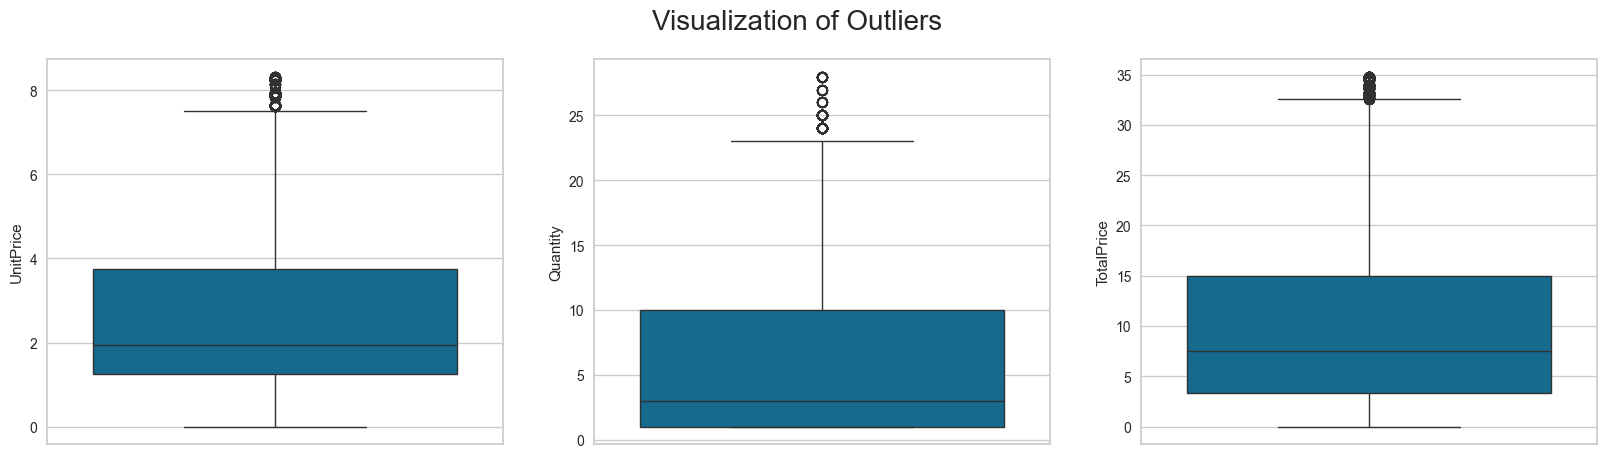

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle("Visualization of Outliers", size=20)
for i, column in enumerate(['UnitPrice', 'Quantity', 'TotalPrice']):
    sns.boxplot(data=data, y=column, ax=axes[i])

# SALES ANALYSIS

In [34]:
daily_sales = data.groupby(data['InvoiceDate'].dt.date)['TotalPrice'].sum()
rolling_mean = daily_sales.rolling(window=30).mean()

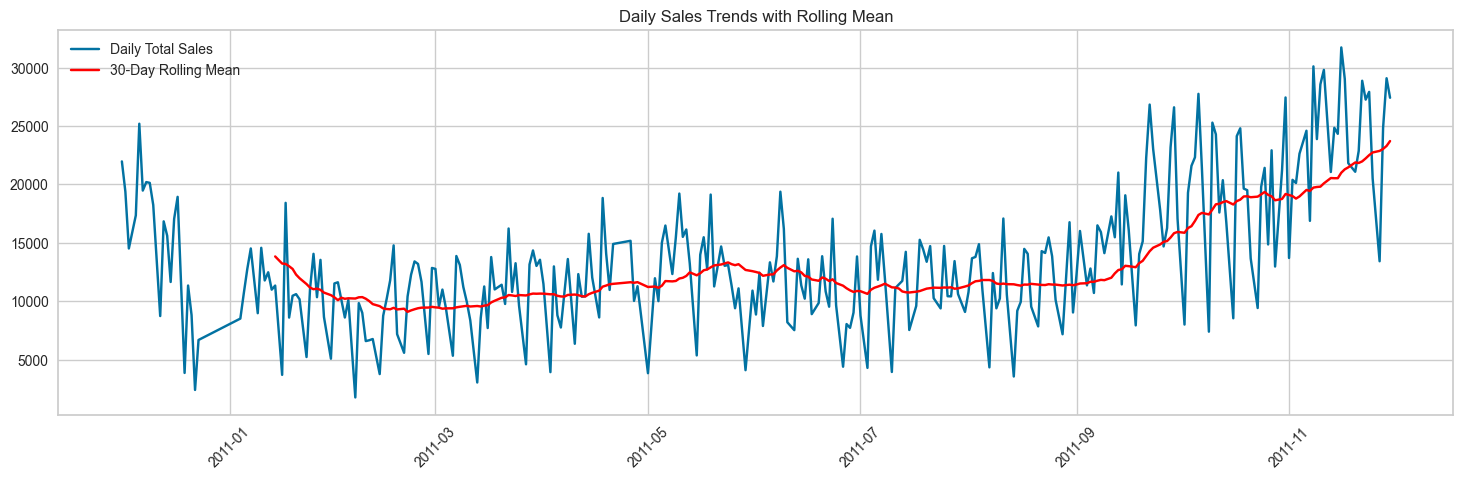

In [35]:
plt.figure(figsize=(18, 5))
plt.plot(daily_sales.index, daily_sales, label='Daily Total Sales')
plt.plot(daily_sales.index, rolling_mean, color='red', label='30-Day Rolling Mean')
plt.title('Daily Sales Trends with Rolling Mean')
plt.legend()
plt.xticks(rotation=45)
plt.show()

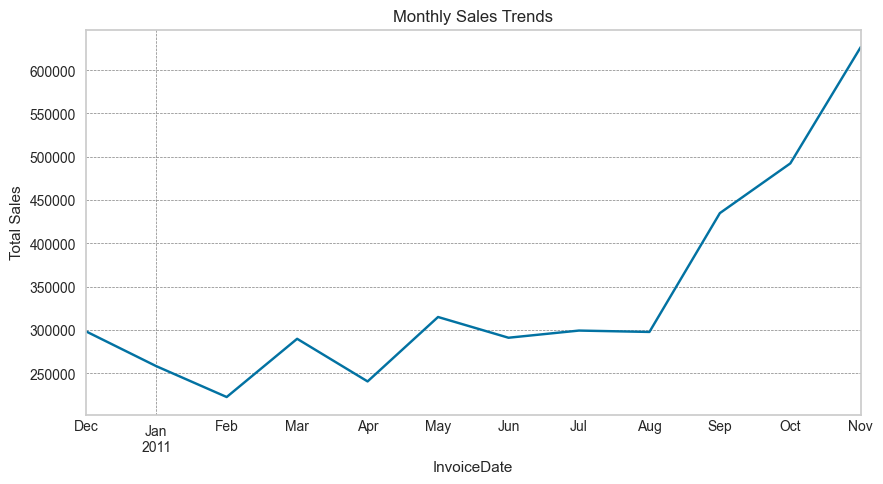

In [36]:
daily_sales.index = pd.to_datetime(daily_sales.index)
monthly_sales = daily_sales.resample('M').sum()

plt.figure(figsize=(10, 5))
monthly_sales.plot(title='Monthly Sales Trends')
plt.ylabel('Total Sales')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.show()

# COUNTRY ANALYSIS

In [80]:
country_sales = data.groupby('Country')['TotalPrice'].sum().reset_index()
top_countries = country_sales.sort_values(by='TotalPrice', ascending=False).head(5).reset_index(drop=True)
top_countries

Country   TotalPrice
0  United Kingdom  3578815.673
1         Germany   106491.180
2          France    99161.100
3            EIRE    88610.310
4           Spain    27511.120

In [37]:
avg_cart_value = data.groupby('Country')['TotalPrice'].mean().reset_index()
avg_unit_price = data.groupby('Country')['UnitPrice'].mean().reset_index()
avg_quantity = data.groupby('Country')['Quantity'].mean().reset_index()

Text(0.5, 1.0, 'Average Quantity')

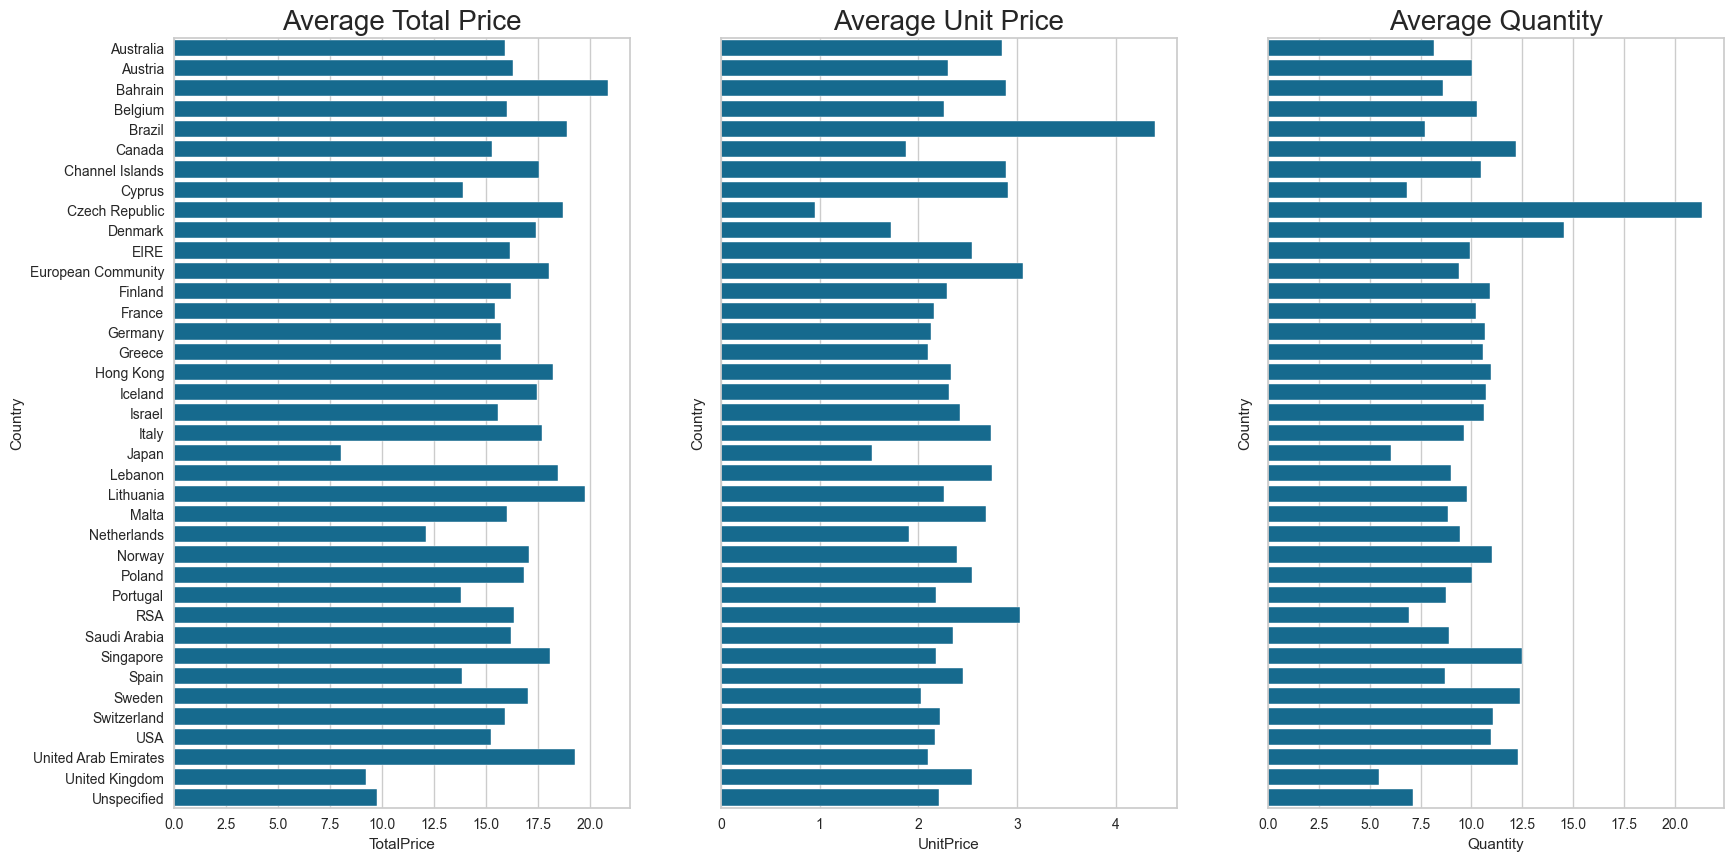

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
sns.barplot(x='TotalPrice', y='Country', data=avg_cart_value, ax=axes[0])
sns.barplot(x='UnitPrice', y='Country', data=avg_unit_price, ax=axes[1])
sns.barplot(x='Quantity', y='Country', data=avg_quantity, ax=axes[2])
axes[1].set_yticklabels([])
axes[2].set_yticklabels([])
axes[0].set_title('Average Total Price',fontsize=20)
axes[1].set_title('Average Unit Price',fontsize=20)
axes[2].set_title('Average Quantity',fontsize=20)

In [39]:
import plotly.graph_objects as go

choro_map_data = {
    "type": "choropleth",
    "colorscale": "Viridis",
    "locations": avg_cart_value['Country'],
    "locationmode": "country names",
    "z": avg_cart_value['TotalPrice'].astype(float),  
    "text": avg_cart_value['Country'],
    "colorbar": {"title": "Avg Total Cart Value"}
}

layout = {
    "title": "Average Cart Value by Country",
    "geo": {
        "showframe": False,
        "projection": {'type': 'mercator'},
        "landcolor": 'rgb(243, 243, 243)',
        "showland": True,
        "showcountries": True,
        "countrycolor": 'rgb(204, 204, 204)'
    },
 
    "width": 800,  
    "height": 600,  
    "margin": {"r": 10, "t": 40, "l": 10, "b": 10}  
}

fig = go.Figure(data=[choro_map_data], layout=layout)
fig.show()


# SALES FOR UNITED KINGDOM

In [40]:
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']
general_trend_uk = data[data['Country'] == 'United Kingdom'].copy()
general_trend_uk['Date'] = pd.to_datetime(general_trend_uk['InvoiceDate']).dt.to_period('M')

monthly_sales_uk = general_trend_uk.groupby('Date')['TotalPrice'].sum().reset_index()
monthly_sales_uk['Date'] = monthly_sales_uk['Date'].dt.to_timestamp()

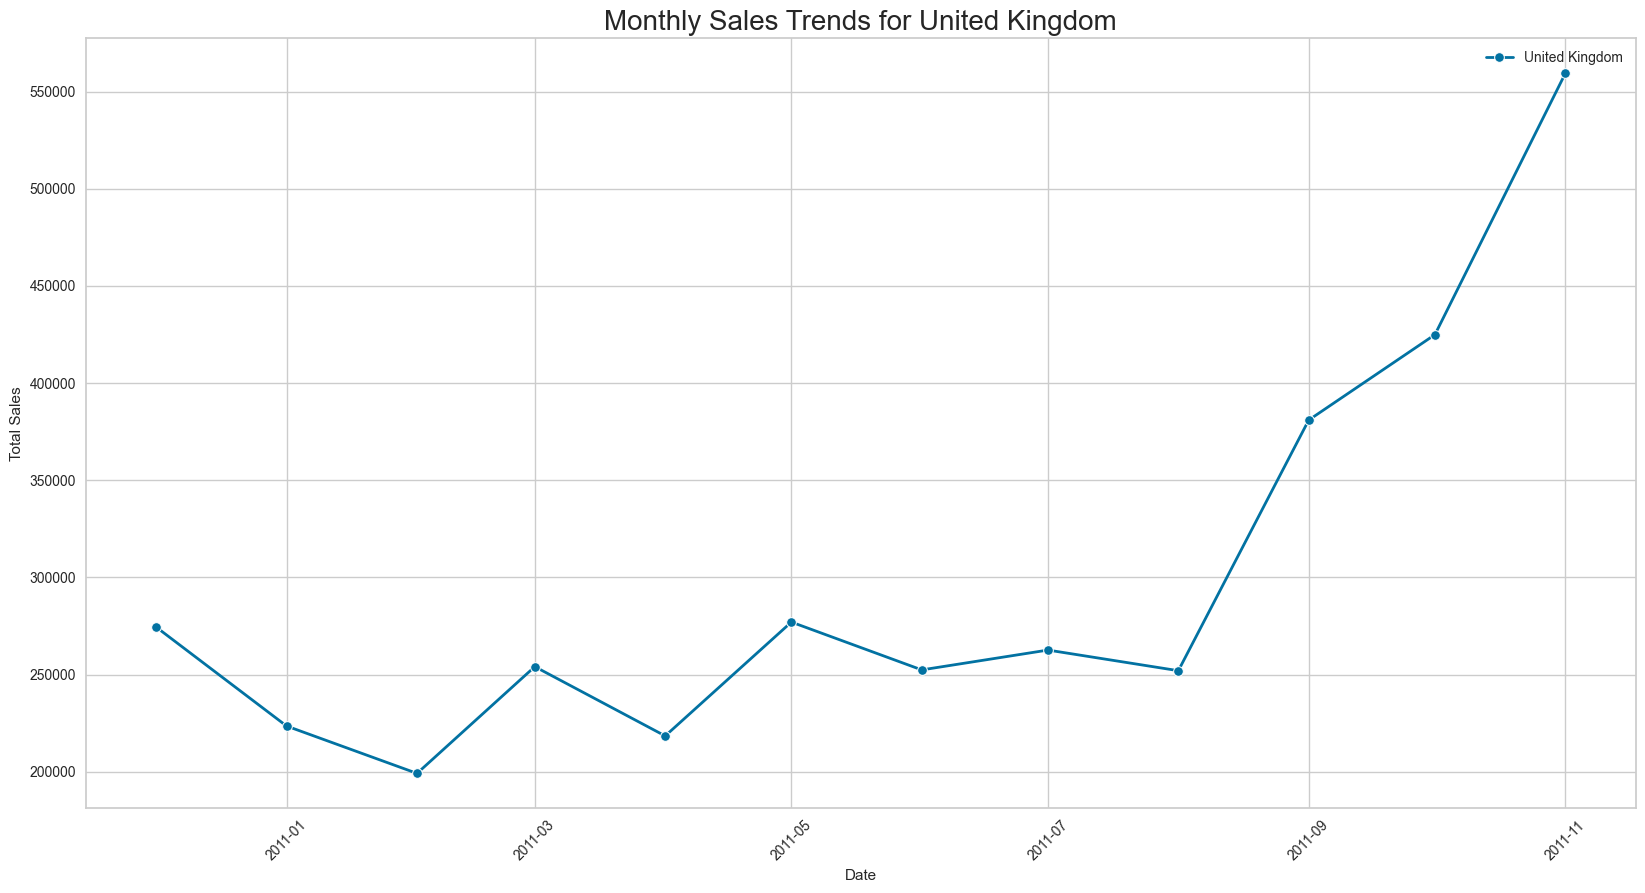

In [41]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=monthly_sales_uk, x='Date', y='TotalPrice', marker='o', label='United Kingdom', linewidth=2)
plt.title('Monthly Sales Trends for United Kingdom',fontsize=20)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

# SALES FOR COUNTRIES OTHER THAN UNITED KINGDOM

In [42]:
general_trend_others = data[data['Country'] != 'United Kingdom'].copy()
general_trend_others['Date'] = pd.to_datetime(general_trend_others['InvoiceDate']).dt.to_period('M')

monthly_sales_others = general_trend_others.groupby(['Date', 'Country'])['TotalPrice'].sum().reset_index()
monthly_sales_others['Date'] = monthly_sales_others['Date'].dt.to_timestamp()

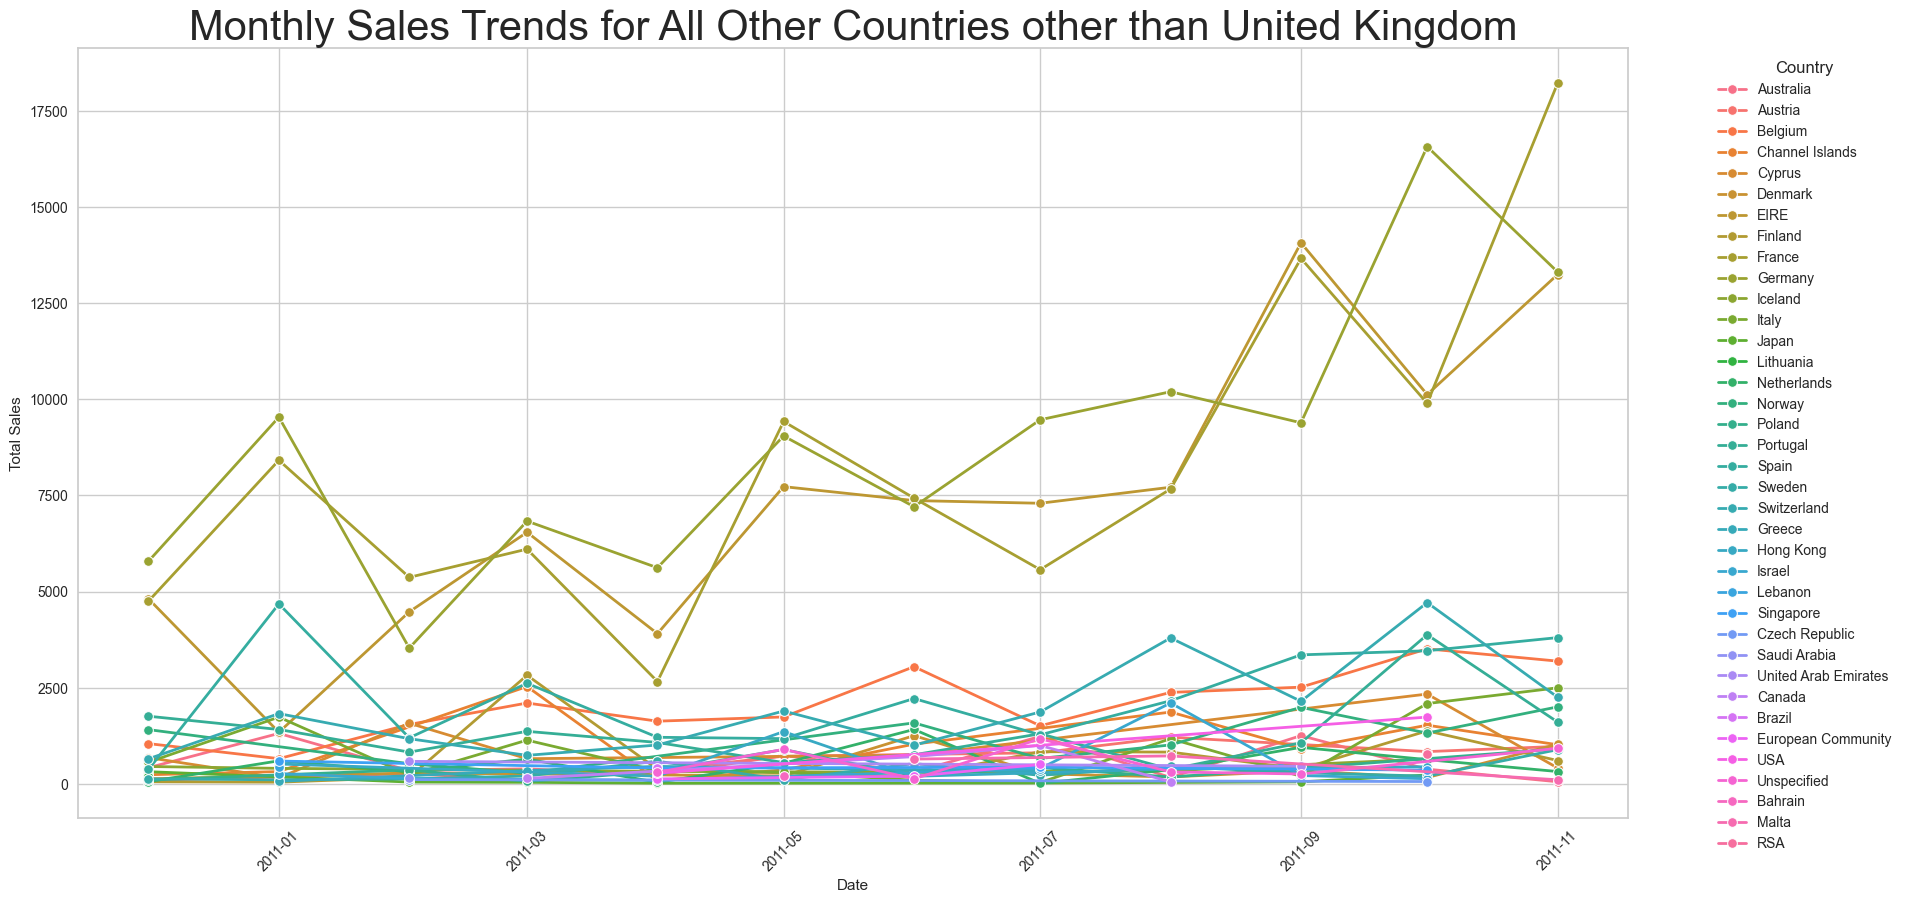

In [43]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=monthly_sales_others, x='Date', y='TotalPrice', hue='Country', marker='o', linewidth=2)
plt.title('Monthly Sales Trends for All Other Countries other than United Kingdom',fontsize=30)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Country', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()

In [44]:
country_sales = monthly_sales_others.groupby('Country')['TotalPrice'].sum().reset_index()
choro_data = dict(
    type="choropleth",
    colorscale="Viridis",
    locations=country_sales['Country'],
    locationmode="country names",
    z=country_sales['TotalPrice'].astype(float).round(0).tolist(),
    hovertext=country_sales['Country'],
    hovertemplate="%{hovertext}: £%{z:,.0f} <extra></extra>",
    colorbar={"title": "Total Price"},
)

layout = dict(
    title="Total Sales For Each Country Except UK",
    geo=dict(showframe=False, bgcolor="#BAEAED"),
    margin={"r": 0, "t": 50, "l": 10, "b": 0}
)

fig = go.Figure(data=[choro_data], layout=layout)
iplot(fig)

# Best Selling Product for each Country : 

In [45]:
sum_total_price_products = pd.DataFrame(data.groupby(["Country", "Description"])["TotalPrice"].sum())
best_selling_product = pd.DataFrame(data=sum_total_price_products.groupby(["Country"])['TotalPrice'].idxmax().values.tolist(), columns=['Country', 'Best Selling Product'])
max_sales = sum_total_price_products.groupby("Country")["TotalPrice"].max().values.tolist()
best_selling_product["Sales"] = max_sales

In [46]:
total_sales = sum_total_price_products.groupby("Country")["TotalPrice"].sum().values.tolist()
best_selling_product["Country total sales"] = total_sales
best_selling_product["% of country sales"] = best_selling_product["Sales"] / best_selling_product["Country total sales"]

best_selling_product.style.format({
    "Sales": "£{0:,.2f}",
    "Country total sales": "£{0:,.2f}",
    "% of country sales": "{:.2%}"
})

# CUSTOMER DISTRIBUTION :

In [47]:
monthly_customers = data.groupby(data['InvoiceDate'].dt.to_period('M'))['CustomerID'].nunique()
monthly_customers = monthly_customers.reset_index()
monthly_customers['Date'] = monthly_customers['InvoiceDate'].dt.to_timestamp()
monthly_customers.rename(columns={'CustomerID': 'Distinct Customers'}, inplace=True)

In [48]:
customers_seen = set()
number_new_customers = []

In [49]:
for month, group in data.groupby(data['InvoiceDate'].dt.to_period('M')):
    current_customers = set(group['CustomerID'].unique())
    new_customers = current_customers - customers_seen
    customers_seen.update(current_customers)
    number_new_customers.append({'Date': month.to_timestamp(), 'New Customers': len(new_customers)})

In [50]:
number_new_customers = pd.DataFrame(number_new_customers)

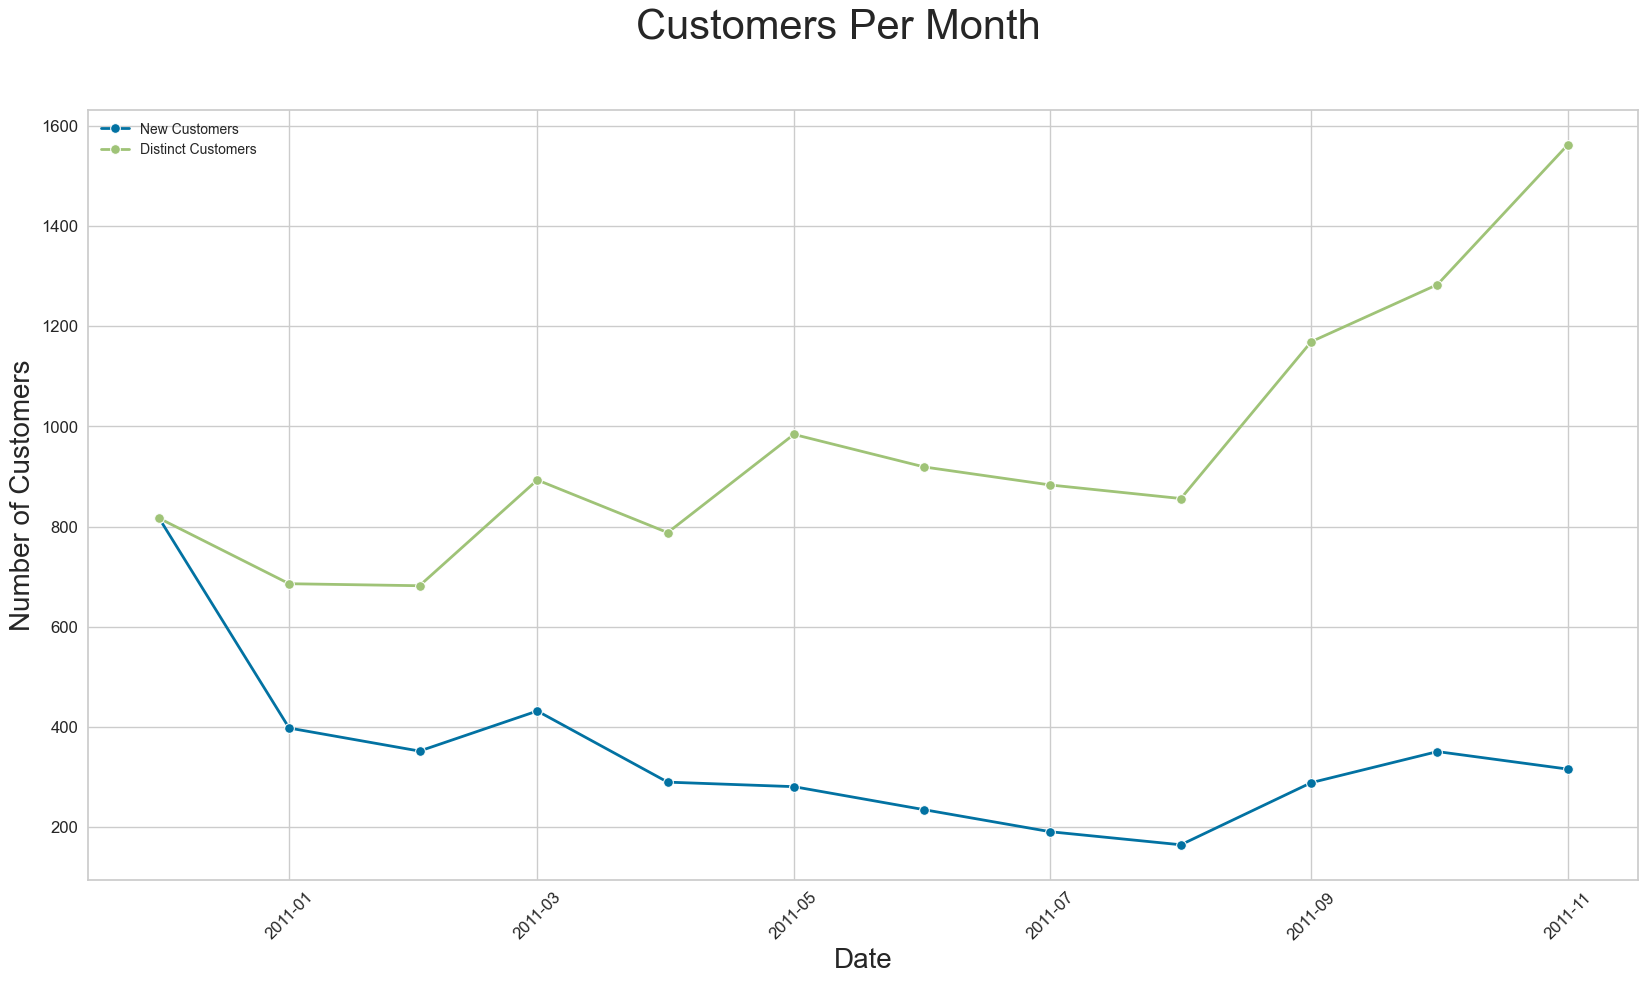

In [51]:
plt.figure(figsize=(20, 10))
plt.suptitle('Customers Per Month', fontsize=30)
sns.lineplot(data=number_new_customers, x='Date', y='New Customers', marker='o', linewidth=2, label='New Customers')
sns.lineplot(data=monthly_customers, x='Date', y='Distinct Customers', marker='o', linewidth=2, label='Distinct Customers')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Number of Customers', fontsize=20)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

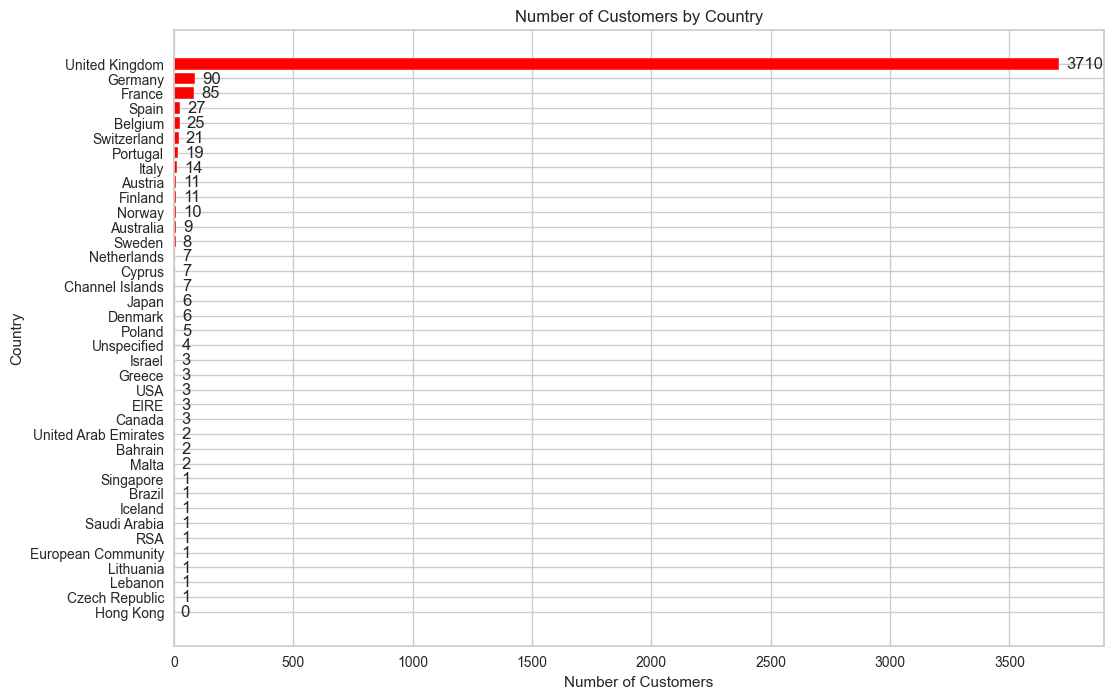

In [52]:
customers_per_country = data.groupby('Country')['CustomerID'].nunique().reset_index()
customers_per_country = customers_per_country.sort_values(by='CustomerID', ascending=True)


plt.figure(figsize=(12, 8))  
bars = plt.barh(customers_per_country['Country'], customers_per_country['CustomerID'], color='red')
plt.title('Number of Customers by Country') 
plt.xlabel('Number of Customers')
plt.ylabel('Country')
plt.grid(True, axis='x')  


for bar in bars:
    label = f'{int(bar.get_width())}'  
    plt.annotate(label,                
                 (bar.get_width(), bar.get_y() + bar.get_height() / 2),  
                 textcoords="offset points",
                 xytext=(5, 0),              
                 ha='left',                
                 va='center')                

plt.show()

# TIMING OF TRANSACTIONS :

In [53]:
transactions = data.groupby(['CustomerID', 'InvoiceDate']).Quantity.sum().reset_index()
transactions['Hour'] = transactions['InvoiceDate'].dt.hour
transactions['Month'] = transactions['InvoiceDate'].dt.to_period('M')

In [54]:
print('Frequency of transactions every hour : ')
print('------------------------------------------')
hourly_counts = pd.DataFrame(columns=range(1, 25))
hourly_counts['Month'] = ""
for month in sorted(transactions['Month'].unique()):
    row = [len(transactions[(transactions['Month'] == month) & (transactions['Hour'] == hour)]) for hour in range(1, 25)]
    row.append(month)
    hourly_counts.loc[len(hourly_counts)] = row

hourly_counts.set_index('Month', inplace=True)
hourly_counts

Frequency of transactions every hour : 
------------------------------------------


1   2   3   4   5   6   7   8    9    10  ...   15   16  17  18  19  \
Month                                              ...                         
2010-12   0   0   0   0   0   0   2  23   78  140  ...  152   80  43  17  11   
2011-01   0   0   0   0   0   0   0   8   60  113  ...  109   55  16   4   2   
2011-02   0   0   0   0   0   0   0  20   70  114  ...   90   40  23   3   6   
2011-03   0   0   0   0   0   0   1  50   90  126  ...  120   58  26  14  11   
2011-04   0   0   0   0   0   0   3  37   70  120  ...   96   64  21  11  11   
2011-05   0   0   0   0   0   0   3  53  108  167  ...  137   78  30  13  20   
2011-06   0   0   0   0   0   0   6  40   84  129  ...  122   74  34  12  18   
2011-07   0   0   0   0   0   0   0  23   68  146  ...  146   53  49  18   8   
2011-08   0   0   0   0   0   1   0  25   75  151  ...  125   62  43   8   5   
2011-09   0   0   0   0   0   0   0  24  126  174  ...  182   79  35  16   8   
2011-10   0   0   0   0   0   0   2  48  128  182  ...  188   94  45   8   4   
2011-11   0   0   0   0   0   0   2  95  162  229  ...  249  188  95  12  14   

         20  21  22  23  24  
Month                        
2010-12   1   0   0   0   0  
2011-01   0   0   0   0   0  
2011-02   0   0   0   0   0  
2011-03   2   0   0   0   0  
2011-04   0   0   0   0   0  
2011-05   3   0   0   0   0  
2011-06   2   0   0   0   0  
2011-07   2   0   0   0   0  
2011-08   2   0   0   0   0  
2011-09   0   0   0   0   0  
2011-10   3   0   0   0   0  
2011-11   1   0   0   0   0  

[12 rows x 24 columns]

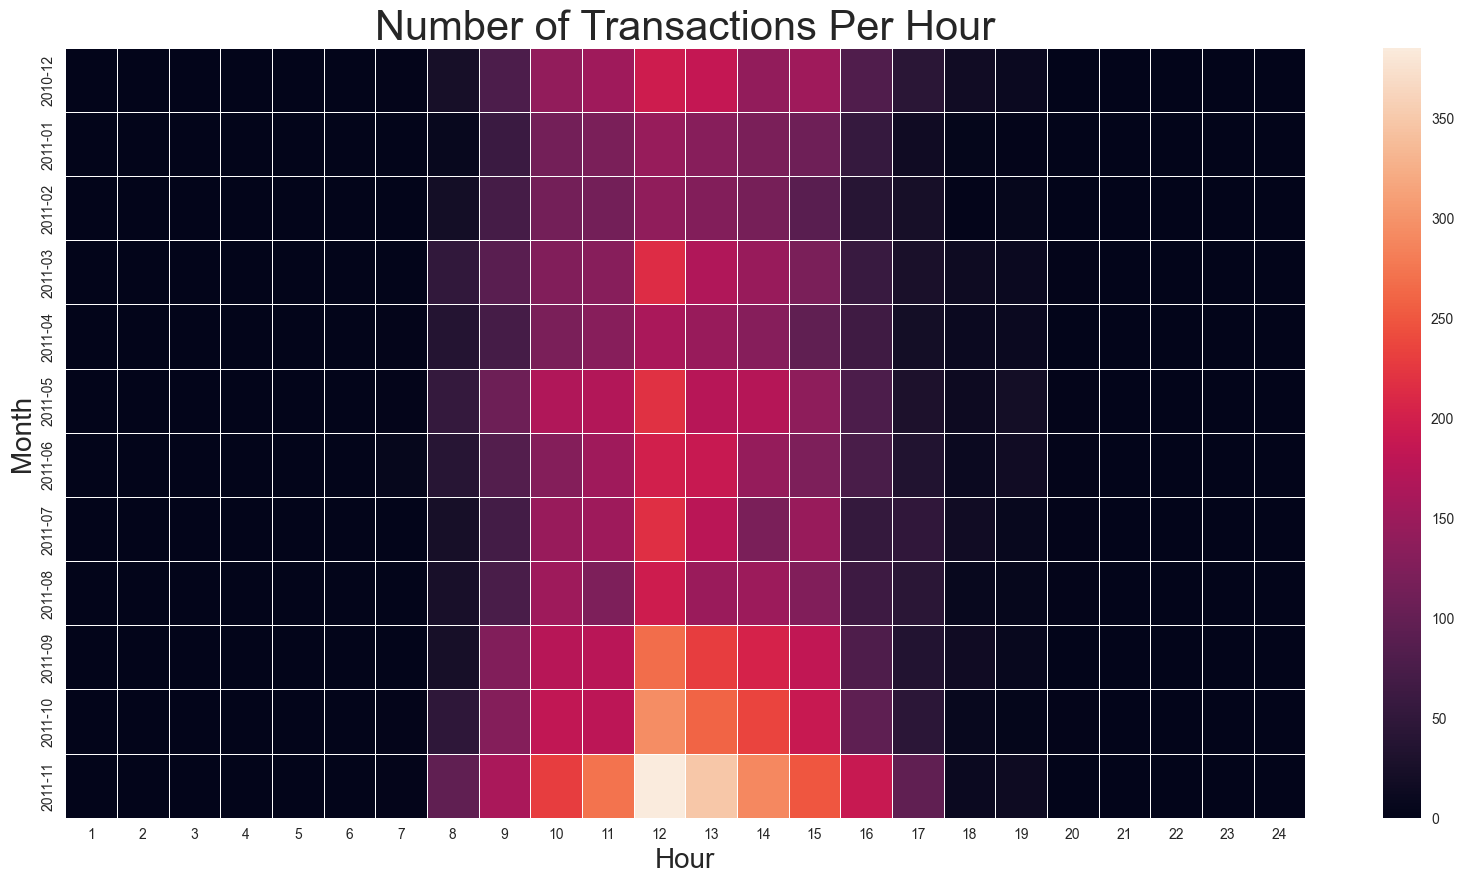

In [55]:
plt.figure(figsize=(20, 10))
plt.title('Number of Transactions Per Hour', fontsize=30)
sns.heatmap(data=hourly_counts, linewidths=0.5)
plt.xlabel("Hour", fontsize=20)
plt.ylabel("Month", fontsize=20)
plt.show()

In [56]:
def categorize_time(hour):
    if 5 <= hour < 8:
        return "Early morning"
    elif 8 <= hour < 11:
        return "Morning"
    elif 11 <= hour < 13:
        return "Late morning"
    elif 13 <= hour < 14:
        return "Early afternoon"
    elif 14 <= hour < 15:
        return "Afternoon"
    elif 15 <= hour < 17:
        return "Late afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"
    
transactions['TimeOfDay'] = transactions['InvoiceDate'].dt.hour.apply(categorize_time)

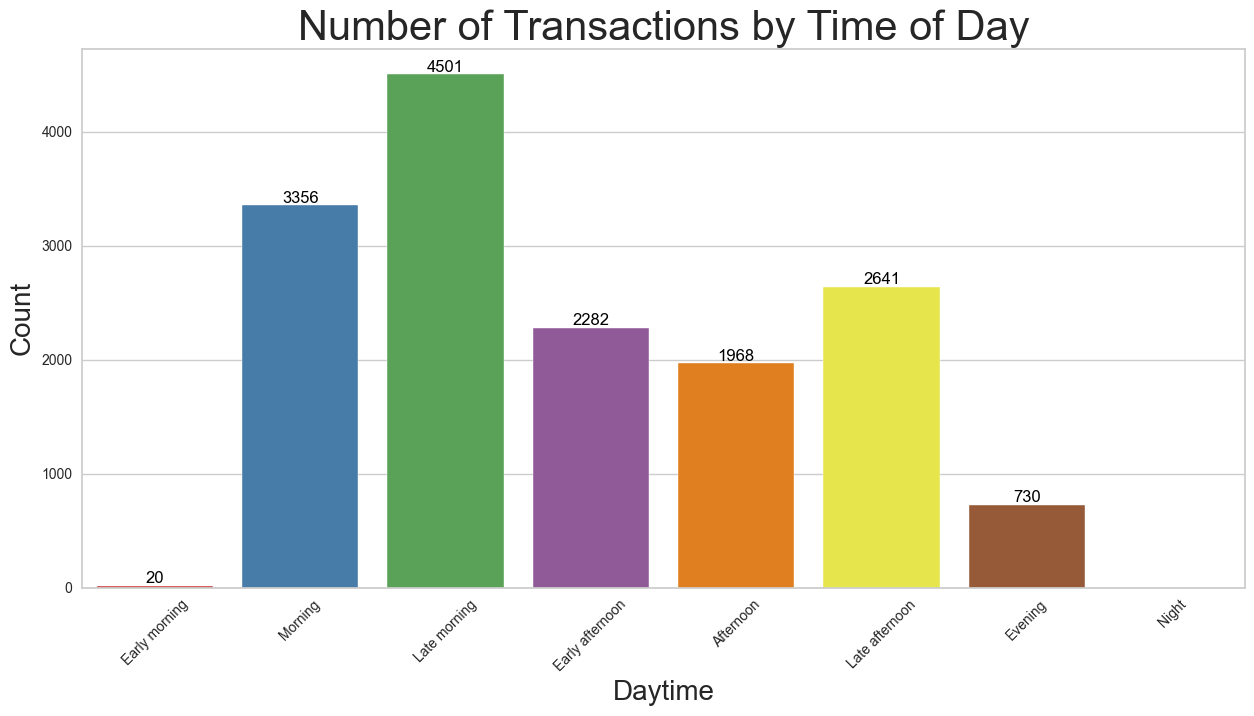

In [57]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=transactions, x='TimeOfDay', order=["Early morning", "Morning", "Late morning", "Early afternoon", "Afternoon", "Late afternoon", "Evening", "Night"], palette="Set1")
plt.title('Number of Transactions by Time of Day',fontsize=30)
plt.xlabel("Daytime", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# RFM Analysis : 

In [58]:
today_date = dt.datetime(2011, 12, 1)
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (today_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).rename(columns={'InvoiceDate': 'recency', 'InvoiceNo': 'frequency', 'TotalPrice': 'monetary'})

In [59]:
rfm['recency_score'] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['frequency_score'] = pd.qcut(rfm['frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

In [60]:
rfm['RFM_Score'] = rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str)
segment_map = {
    '[1-2][1-2]': 'Dormant',
    '[1-2][3-4]': 'Vulnerable',
    '[1-2]5': 'Must Keep',
    '3[1-2]': 'Sleeping',
    '33': 'Needs Attention',
    '[3-4][4-5]': 'Faithful Customers',
    '41': 'Promising',
    '51': 'Newcomers',
    '[4-5][2-3]': 'Potential Faithfuls',
    '5[4-5]': 'Top Customers'
}
rfm['segment'] = rfm['RFM_Score'].replace(segment_map, regex=True)

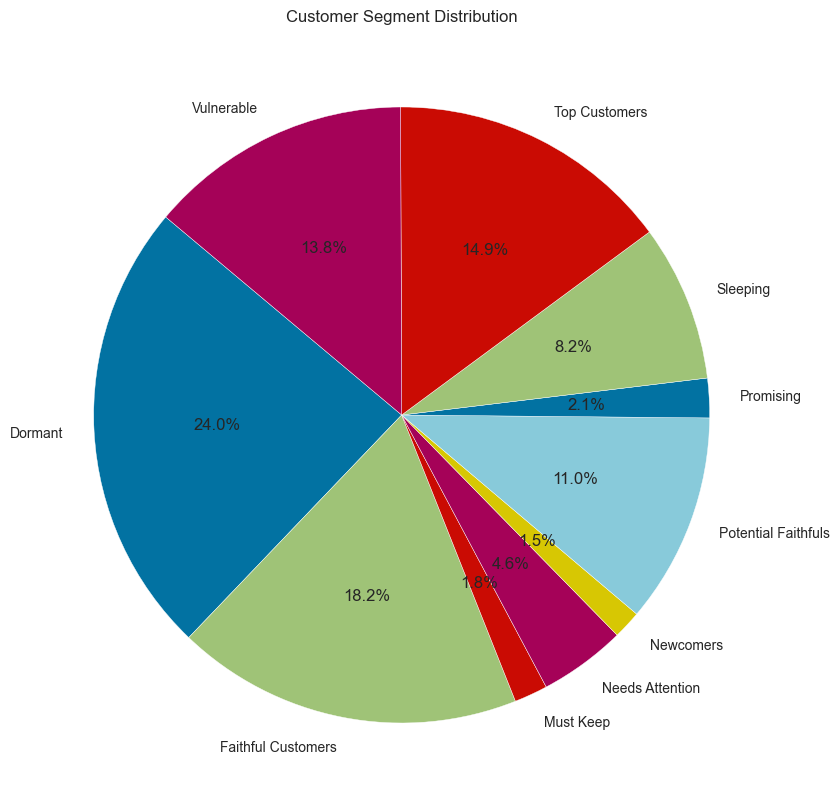

In [61]:
segment_distribution = rfm.groupby('segment').size().reset_index(name='count')
plt.figure(figsize=(20, 10))
plt.pie(segment_distribution['count'], labels=segment_distribution['segment'], autopct='%1.1f%%', startangle=140)
plt.title('Customer Segment Distribution')
plt.show()

In [62]:
rfm_summary = rfm.groupby('segment').agg({'recency': 'mean', 'frequency': 'mean', 'monetary': ['mean', 'count']})
rfm_summary

recency  frequency     monetary      
                           mean       mean         mean count
segment                                                      
Dormant              218.259146   1.046748   220.341260   984
Faithful Customers    32.961126   6.128686  1407.789666   746
Must Keep            126.541667   7.513889  1290.210833    72
Needs Attention       49.994652   2.213904   541.364545   187
Newcomers              6.918033   1.000000   214.805410    61
Potential Faithfuls   15.046358   1.801325   405.769978   453
Promising             22.611765   1.000000   223.830000    85
Sleeping              50.881306   1.068249   276.789172   337
Top Customers          5.978793  10.047308  2194.136607   613
Vulnerable           154.908451   2.667254   530.566780   568

# K-MEANS CLUSTERING : 

In [63]:
data_clustering = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (today_date - pd.to_datetime(x).max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).rename(columns={'InvoiceDate': 'recency', 'InvoiceNo': 'frequency', 'TotalPrice': 'monetary'})


In [64]:
std_scaler = StandardScaler()
data_scaled = std_scaler.fit_transform(data_clustering)
data_scaled = pd.DataFrame(data_scaled, columns=['recency', 'frequency', 'monetary'])
data_scaled["CustomerID"] = data_clustering.index
data_scaled.set_index("CustomerID", drop=True, inplace=True)

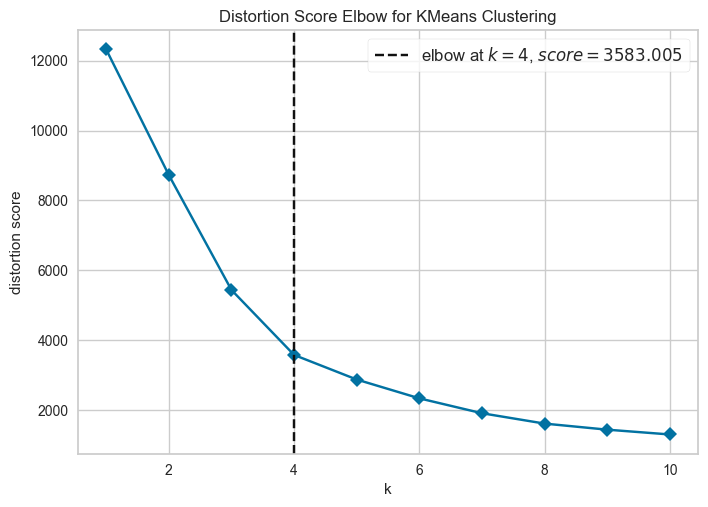

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [65]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1,11), timings=False)
visualizer.fit(data_scaled)
visualizer.show()

In [67]:
range_k = range(2, 11) 
silhouette_scores = {}

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores[k] = silhouette_avg
    print(f"Silhouette Score for k = {k}: {silhouette_avg:.4f}")

best_k = max(silhouette_scores, key=silhouette_scores.get)
print(f"Best number of clusters (k) is {best_k} with a Silhouette Score of {silhouette_scores[best_k]:.4f}")

Silhouette Score for k = 2: 0.5076
Silhouette Score for k = 3: 0.5244
Silhouette Score for k = 4: 0.5655
Silhouette Score for k = 5: 0.5618
Silhouette Score for k = 6: 0.4955
Silhouette Score for k = 7: 0.4688
Silhouette Score for k = 8: 0.4629
Silhouette Score for k = 9: 0.4341
Silhouette Score for k = 10: 0.4170
Best number of clusters (k) is 4 with a Silhouette Score of 0.5655


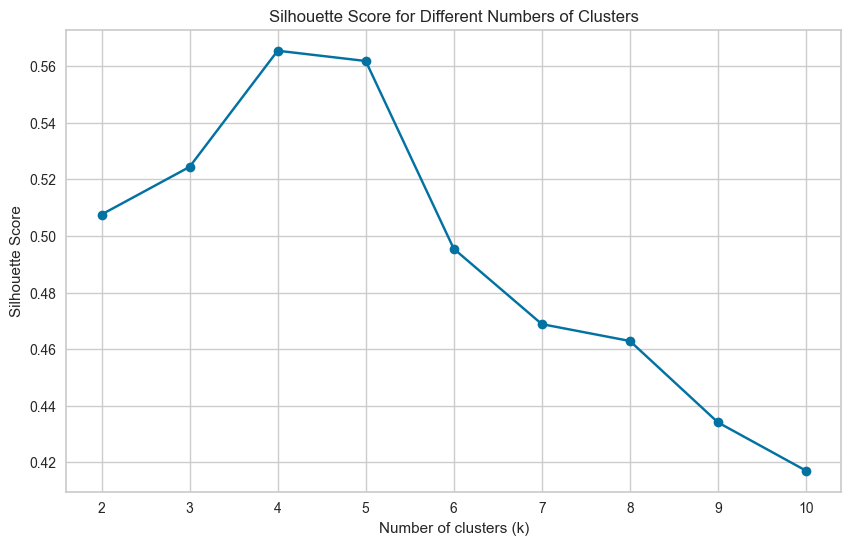

In [68]:
plt.figure(figsize=(10, 6))
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xticks(list(range_k))  
plt.grid(True)
plt.show()

In [69]:
kmeans = KMeans(n_clusters=4, n_init=15, random_state=1)
kmeans.fit(data_scaled)
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns=['recency', 'frequency', 'monetary'])

In [70]:
data_labels = pd.DataFrame(kmeans.labels_, columns=['labels'])
data_labels['labels'] = data_labels['labels'].astype('category')

In [71]:
data_kmeans = data_clustering.copy()
data_kmeans['labels'] = data_labels['labels'].values

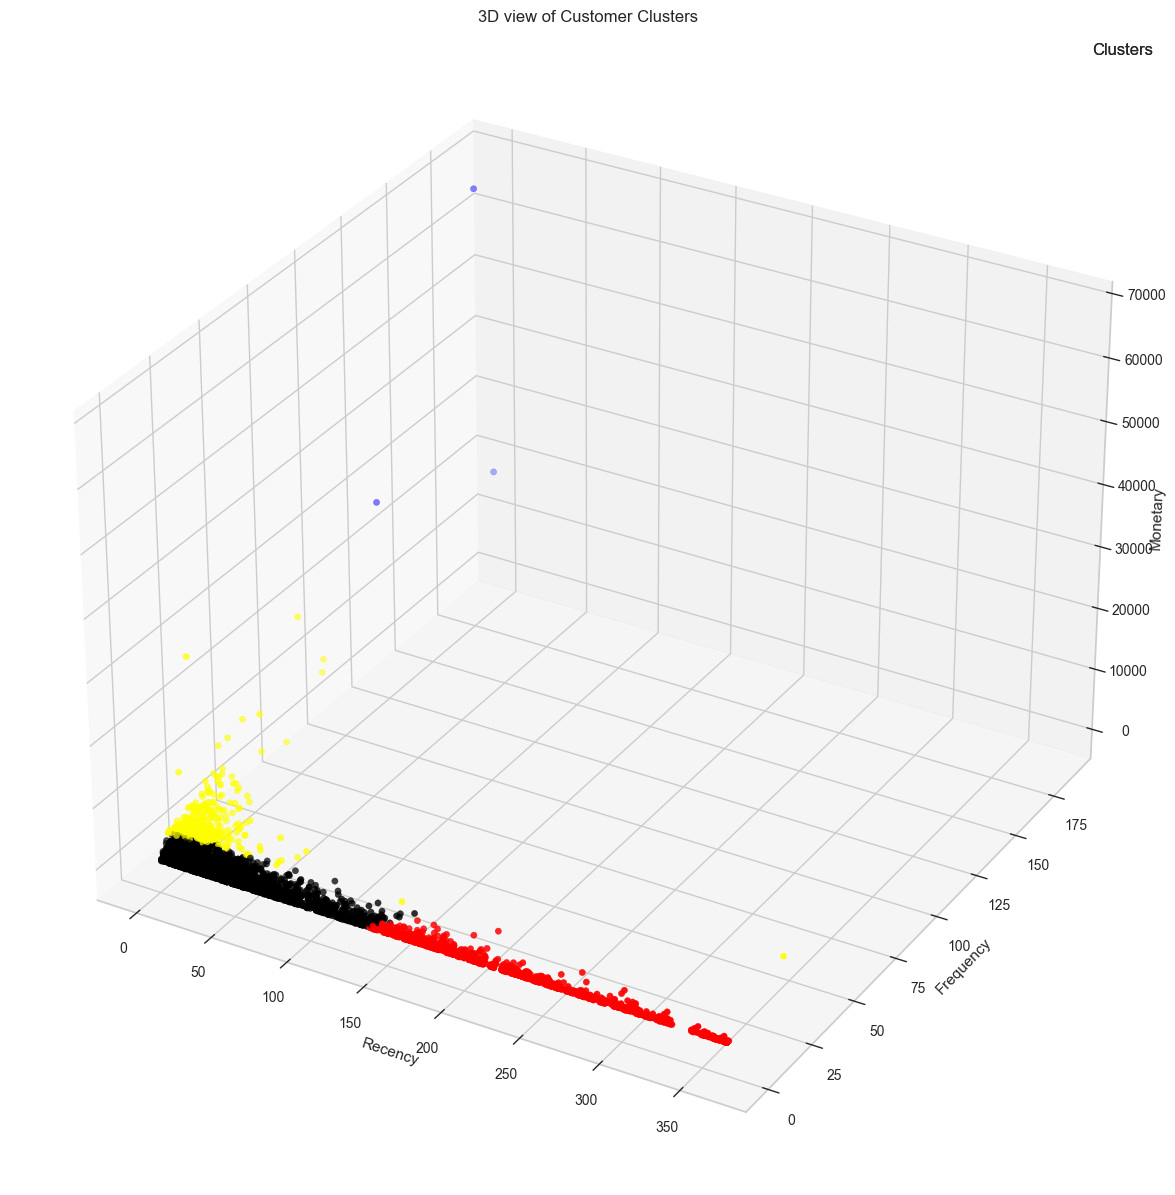

In [72]:
colors = ["black", "red", "blue", "yellow"]
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data_kmeans["recency"], data_kmeans["frequency"], data_kmeans["monetary"], c=data_kmeans['labels'].apply(lambda x: colors[x]), marker='o')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('3D view of Customer Clusters')
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)
plt.show()

In [73]:
cluster_stats = data_kmeans.groupby('labels').agg(['mean', 'count', 'max'])
cluster_stats

recency              frequency                 monetary        \
              mean count  max        mean count  max          mean count   
labels                                                                     
0        42.586735  2744  160    3.148688  2744   15    682.042581  2744   
1       240.735099  1057  364    1.497635  1057   12    266.281524  1057   
2         0.666667     3    1  160.666667     3  186  38324.446667     3   
3        14.764901   302  363   16.052980   302   88   3803.932417   302   

                  
             max  
labels            
0        3856.15  
1        2107.31  
2       66974.64  
3       29242.79

In [74]:
data_kmeans.reset_index(inplace=True)
clusters_count = data_kmeans.groupby('labels').size().reset_index(name='count')
clusters_count.columns = ['cluster', 'count']

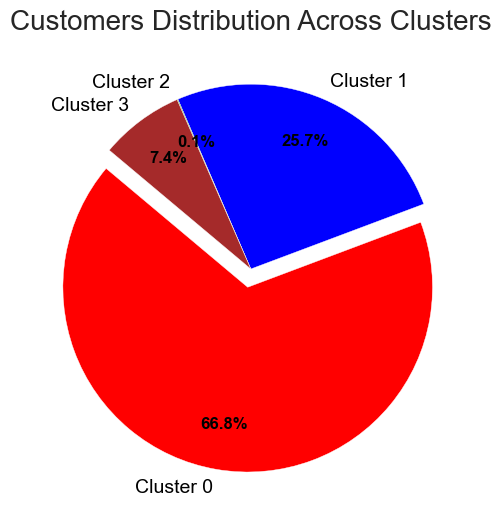

In [75]:
fig, ax = plt.subplots(figsize=(10, 6))
explode = (0.1, 0, 0, 0)  
colors = ['red','blue','green','brown']  
wedges, texts, autotexts = ax.pie(clusters_count['count'], explode=explode, labels=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3'],
                                  autopct='%1.1f%%', startangle=140, colors=colors,
                                  pctdistance=0.75, textprops={'color': "black", 'fontsize': 12}) 
plt.title('Customers Distribution Across Clusters', fontsize=20)
plt.setp(autotexts, size=12, weight="bold") 
plt.setp(texts, size=14)
plt.show()

In [76]:
silhouette_avg = silhouette_score(data_scaled, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")
davies_bouldin = davies_bouldin_score(data_scaled, kmeans.labels_)
print(f"Davies-Bouldin Index: {davies_bouldin}")
calinski_harabasz = calinski_harabasz_score(data_scaled, kmeans.labels_)
print(f"Calinski-Harabasz Index: {calinski_harabasz}")

Silhouette Score: 0.5656164535681453
Davies-Bouldin Index: 0.6394990897875493
Calinski-Harabasz Index: 3333.4166275839725


In [77]:
data_clustering['Cluster'] = kmeans.labels_ 
for i in range(4):
    print(f"Cluster {i} : ")
    print('------------------')
    display(data_clustering[data_clustering['Cluster'] == i].head())
    print("\n")

Cluster 0 : 
------------------


recency  frequency  monetary  Cluster
CustomerID                                       
12347.0          30          6   2463.51        0
12349.0           9          1   1038.75        0
12352.0          27          7   1111.74        0
12357.0          24          1   1041.55        0
12359.0          48          4   3297.48        0



Cluster 1 : 
------------------


recency  frequency  monetary  Cluster
CustomerID                                       
12348.0         239          3     90.20        1
12350.0         301          1    294.40        1
12353.0         195          1     29.30        1
12354.0         223          1    722.83        1
12355.0         205          1    179.40        1



Cluster 2 : 
------------------


recency  frequency  monetary  Cluster
CustomerID                                       
12748.0           1        186  18752.44        2
14911.0           0        177  66974.64        2
17841.0           1        119  29246.26        2



Cluster 3 : 
------------------


recency  frequency  monetary  Cluster
CustomerID                                       
12362.0          26          9   3486.68        3
12395.0          10         12   1809.17        3
12428.0          16          8   3675.62        3
12431.0          51         13   3209.81        3
12433.0           0          5   3532.42        3